In [2]:
import numpy as np 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))

X = np.hstack((cluster1, cluster2)).T
X = np.vstack((X,X)).T

K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, meandistortions,  'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

ValueError: n_samples=2 should be >= n_clusters=3

[[1 1]
 [2 3]
 [3 2]
 [1 2]
 [5 8]
 [6 6]
 [5 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [7 1]
 [9 3]]
2
3
4
5
8


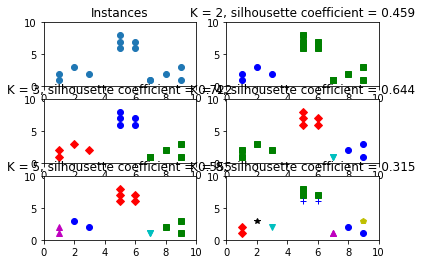

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
print(X)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o','s', 'D', 'v', '^', 'p', '*', '+']
tests = [2,3,4,5,8]
subplot_counter = 1
for t in tests:
    print(t)
    subplot_counter +=1
    plt.subplot(3,2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.title('K = %s, silhousette coefficient = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))
plt.show()